In [73]:
import h5py
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import shap
import lightgbm as lgb 
import optuna
from optuna.samplers import TPESampler
from optuna.integration import LightGBMPruningCallback
from optuna.pruners import MedianPruner
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import mean_absolute_error 
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif, mutual_info_regression
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error

In [74]:
# read data
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[-1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')
test  = load_data('test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

all = train[all_variables]

electron_truth = train['Truth']
y = train['p_truth_E']
y = y[electron_truth==1]
X = train[all_variables]
X = X[electron_truth==1]
y = y.to_numpy(dtype='float32')

# print(y)
# prepocessing

norm = preprocessing.MinMaxScaler()
sc_X = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()
X = sc_X.fit_transform(X)
y = np.reshape(y, (-1,1))
y = sc_y.fit_transform(y)
y = y.ravel()

print(y)

X = pd.DataFrame(X, columns=all_variables)
# y = pd.DataFrame(y, columns=['p_truth_E'])


print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)
[-0.41764802 -0.01699412  0.01510229 ... -0.29044643 -0.21449289
 -1.1436536 ]
Shape of X: (121495, 160)
Shape of y: (121495,)


In [75]:
# feature_selection
def selection_features(X_train, y_train, X_test):
    select = SelectKBest(score_func=mutual_info_regression, k=12)
    select.fit(X_train, y_train)
    
    return select

In [76]:
# select = selection_features(X_train, y_train, X_test)
# X = pd.DataFrame(X)
# names = X.columns.values[select.get_support()]
# scores = select.scores_[select.get_support()]
# names_scores = list(zip(names, scores))
# ns_df = pd.DataFrame(data = names_scores, columns=['Feature_names', 'Feature_scores'])
# #Sort the dataframe for better visualization
# ns_df_sorted = ns_df.sort_values(['Feature_names', 'Feature_scores'], ascending = [False, True])
# print(ns_df_sorted)

In [77]:
# def get_feature_importance():
#     model = SelectKBest(mutual_info_regression, k=12)#选择k个最佳特征
#     X_new = model.fit_transform(X, y)
#     #feature_data是特征数据，label_data是标签数据，该函数可以选择出k个特征 
 
#     print("model shape: ",X_new.shape)
 
#     scores = model.scores_
#     print('model scores:', scores)  # 得分越高，特征越重要
 
#     p_values = model.pvalues_
#     print('model p-values', p_values)  # p-values 越小，置信度越高，特征越重要
 
#     # 按重要性排序，选出最重要的 k 个
#     indices = np.argsort(scores)[::-1]
#     k_best_features = list(X.columns.values[indices[0:12]])
 
#     print('k best features are: ',k_best_features)
    
#     return k_best_features


In [78]:
kbest_variables = ['p_eCluster',
 'p_rawECluster',
 'p_eAccCluster',
 'p_ecore',
 'p_E7x11_Lr2',
 'p_E7x7_Lr2',
 'p_e277',
 'p_eClusterLr2',
 'p_E5x7_Lr2',
 'p_e255',
 'p_e237',
 'p_e235']


sc_X_kbest = preprocessing.StandardScaler()
X_kbest = train[kbest_variables]
X_kbest = X_kbest[electron_truth==1]
X_kbest = sc_X_kbest.fit_transform(X_kbest)
X_kbest = pd.DataFrame(X_kbest, columns=kbest_variables)

sc_y_kbest = preprocessing.StandardScaler()
y_kbest = train['p_truth_E']
y_kbest = y_kbest[electron_truth==1]
y_kbest = y_kbest.to_numpy(dtype='float32')
y_kbest = np.reshape(y_kbest, (-1,1))
y_kbest = sc_y_kbest.fit_transform(y_kbest)
y_kbest = y_kbest.ravel()

X_kbest_train, X_kbest_test, y_kbest_train, y_kbest_test = train_test_split(X_kbest, y_kbest, test_size=0.2, random_state=12)

 

In [79]:
def feature_importance_lgb():
    gbm = lgb.LGBMRegressor()
    gbm.fit(X_train, y_train)
    gbm.booster_.feature_importance()

    feature_imp_ = pd.DataFrame({'cols':X_train.columns, 'feature_imp':gbm.feature_importances_})
    feature_imp_.loc[feature_imp_.feature_imp > 0].sort_values(by=['feature_imp'], ascending=False)

    return feature_imp_.loc[feature_imp_.feature_imp > 0].sort_values(by=['feature_imp'], ascending=False).head(12)

feature_importance_lgb()

,cols,feature_imp
22,p_eCluster,264
84,p_deltaEta2,180
53,p_deltaPhiRescaled2,131
52,p_deltaEta1,125
17,p_EptRatio,92
14,p_d0,91
88,p_deltaPhi2,86
15,p_sigmad0,79
99,p_ecore,71
12,p_qOverP,66


In [80]:
from lightgbm import LGBMRegressor
# predict

# optimize hyperparameters of lgb

# def objective_lgb(trial):

#     X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test = train_test_split(X_lgb, y, test_size=0.2, random_state=42)
#     train_data = lgb.Dataset(X_lgb_train, label=y_lgb_train)
#     valid_data = lgb.Dataset(X_lgb_test, label=y_lgb_test)
    
#     boosting_types = ["gbdt", "rf", "dart"]
#     boosting_type = trial.suggest_categorical("boosting_type", boosting_types)

#     params = {
#         'objective': 'regression',
#         'boosting_type': trial.suggest_categorical("boosting_type", ["gbdt", "rf", "dart"]),
#         'max_depth': trial.suggest_int('max_depth', 2, 100),
#         'min_child_samples': trial.suggest_int('min_child_samples', 0, 1000),
#         'metric': 'mae',
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.2, 0.95, step=0.1),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 3000, step=20),
#         'bagging_freq': trial.suggest_categorical('bagging_freq', [1]),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.2, 0.95, step=0.1),
#         'reg_alpha': trial.suggest_float("reg_alpha", 0, 100, step=0.1),
#         'reg_lambda': trial.suggest_int("reg_lambda", 0, 1000, step=1),
#         'verbosity': -1,
#     }

#     lgbm = LGBMRegressor(**params)
#     lgbm.fit(X_lgb_train, y_lgb_train, eval_set=[(X_lgb_test, y_lgb_test)],early_stopping_rounds=100, verbose=False)
#     pred_lgb=lgbm.predict(X_lgb_test)
#     mae = mean_absolute_error(y_lgb_test, pred_lgb)
#     return mae


# study = optuna.create_study(
#     direction="maximize",
#     sampler=TPESampler(seed=42),
#     pruner=MedianPruner(n_warmup_steps=50),
# ) 

# study.optimize(objective_lgb, n_trials=100, show_progress_bar=True)

# study.best_trial.params

In [81]:
def optimized_lgb():
    X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test = train_test_split(X_kbest, y_kbest, test_size=0.2, random_state=42)
    train_data = lgb.Dataset(X_lgb_train, label=y_lgb_train)
    valid_data = lgb.Dataset(X_lgb_test, label=y_lgb_test)

    # params = {
    #     'objective': 'regression',
    #     'metric': 'mae',
    #     'boosting_type': 'rf',
    #     'max_depth': 2,
    #     'min_child_samples': 74,
    #     'learning_rate': 0.4319464280296327,
    #     'feature_fraction': 0.9,
    #     'num_leaves': 680,
    #     'bagging_freq': 1,
    #     'bagging_fraction': 0.2,
    #     'reg_alpha': 63.5,
    #     'reg_lambda': 985,
    #     'verbosity': -1,
    # }

    params = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'rf',
 'max_depth': 2,
 'min_child_samples': 323,
 'learning_rate': 0.38183517656611227,
 'feature_fraction': 0.8,
 'num_leaves': 2580,
 'bagging_freq': 1,
 'bagging_fraction': 0.2,
 'reg_alpha': 88.0,
 'reg_lambda': 835,
        'verbosity': -1,
    }

    lgbm = LGBMRegressor(**params, num_boost_round=1000)
    lgbm.fit(X_lgb_train, y_lgb_train, eval_set=[(X_lgb_test, y_lgb_test)],early_stopping_rounds=100, verbose=False)
    pred_lgb=lgbm.predict(X_lgb_test)
    mae = mean_absolute_error(y_lgb_test, pred_lgb)
    r2s = r2_score(y_lgb_test, pred_lgb)
    
    y_pred = lgbm.predict(X_lgb_test.values)
    y_pred = pd.DataFrame(data=y_pred)
    y_pred = sc_y.inverse_transform(y_pred)
    acc = accuracy_score(y_pred, y_lgb_test)
    
    return mae, r2s, y_pred


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# neural network

def optimized_nn():
    X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test = train_test_split(X_lgb, y, test_size=0.2, random_state=12)
    model = Sequential([
        Dense(9,activation='relu',name='input_layer'),
        Dense(24,activation='relu',name='hidden_layer1'),
        Dense(12,activation='relu',name='hidden_layer2'),
        Dense(1, name='output')])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer=optimizer,
                loss='mae',
                metrics='mae')

    print('--------- TRAINING ---------')
    history = model.fit(x=X_lgb_train, y=y_lgb_train, validation_data=(X_lgb_test, y_lgb_test), epochs = 5)  
    score = model.evaluate(X_lgb_test,  y_lgb_test, verbose=2)
    y_pred = model.predict(X_lgb_test)
    mae = mean_absolute_error(y_pred, y_lgb_test)
    # y_pred = sc_y.inverse_transform(y_pred)

    return score, mae, y_pred, r2_score(y_pred, y_lgb_test)

optimized_nn()

--------- TRAINING ---------
Epoch 1/5
3038/3038 [==============================] - 2s 652us/step - loss: 0.1669 - mae: 0.1669 - val_loss: 0.1402 - val_mae: 0.1402
Epoch 2/5
3038/3038 [==============================] - 2s 640us/step - loss: 0.1473 - mae: 0.1473 - val_loss: 0.1382 - val_mae: 0.1382
Epoch 3/5
3038/3038 [==============================] - 2s 634us/step - loss: 0.1449 - mae: 0.1449 - val_loss: 0.1357 - val_mae: 0.1357
Epoch 4/5
3038/3038 [==============================] - 2s 639us/step - loss: 0.1430 - mae: 0.1430 - val_loss: 0.1351 - val_mae: 0.1351
Epoch 5/5
3038/3038 [==============================] - 2s 636us/step - loss: 0.1419 - mae: 0.1419 - val_loss: 0.1363 - val_mae: 0.1363
760/760 - 0s - loss: 0.1363 - mae: 0.1363 - 319ms/epoch - 420us/step
760/760 [==============================] - 0s 434us/step


([0.13628709316253662, 0.13628709316253662],
 0.13628705,
 array([[-0.49303487],
        [ 0.79981506],
        [-0.3977566 ],
        ...,
        [ 0.3604699 ],
        [-0.27838913],
        [ 0.3236632 ]], dtype=float32),
 0.9006963137958915)

In [84]:
%reload_ext tensorboard
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS1 = hp.HParam('num_units1', hp.Discrete([16, 32, 64, 128]))
HP_NUM_UNITS2 = hp.HParam('num_units2', hp.Discrete([16, 32, 64, 128]))
HP_NUM_UNITS3 = hp.HParam('num_units3', hp.Discrete([16, 32, 64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS1, HP_NUM_UNITS2, HP_NUM_UNITS3],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

def train_test_model(hparams):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS1], activation=tf.nn.relu),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS2], activation=tf.nn.relu),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS3], activation=tf.nn.relu),
    tf.keras.layers.Dense(1),
  ])
  model.compile(
      optimizer='adam',
      loss='mae',
      metrics=['mae'],
  )

  model.fit(X_kbest_train, y_kbest_train, epochs=5) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(X_kbest_test, y_kbest_test)
  return accuracy

def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

session_num = 0

for num_units1 in HP_NUM_UNITS1.domain.values:
    for num_units2 in HP_NUM_UNITS2.domain.values:
      for num_units3 in HP_NUM_UNITS3.domain.values:
            hparams = {
                HP_NUM_UNITS1: num_units1,
                HP_NUM_UNITS2: num_units2,
                HP_NUM_UNITS3: num_units3
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run('logs/hparam_tuning/' + run_name, hparams)
            session_num += 1


--- Starting trial: run-0
{'num_units1': 16, 'num_units2': 16, 'num_units3': 16}
Epoch 1/5
3038/3038 [==============================] - 2s 558us/step - loss: 0.1648 - mae: 0.1648
Epoch 2/5
3038/3038 [==============================] - 2s 527us/step - loss: 0.1432 - mae: 0.1432
Epoch 3/5
3038/3038 [==============================] - 2s 553us/step - loss: 0.1420 - mae: 0.1420
Epoch 4/5
3038/3038 [==============================] - 2s 554us/step - loss: 0.1409 - mae: 0.1409
Epoch 5/5
760/760 [==============================] - 0s 482us/step - loss: 0.1328 - mae: 0.1328
--- Starting trial: run-1
{'num_units1': 16, 'num_units2': 16, 'num_units3': 32}
Epoch 1/5
3038/3038 [==============================] - 2s 565us/step - loss: 0.1516 - mae: 0.1516
Epoch 2/5
3038/3038 [==============================] - 2s 552us/step - loss: 0.1423 - mae: 0.1423
Epoch 3/5
3038/3038 [==============================] - 2s 554us/step - loss: 0.1409 - mae: 0.1409
Epoch 4/5
3038/3038 [==============================] - 2

In [ ]:
%tensorboard --logdir logs/hparam_tuning

# 'num_units1': 64, 'num_units2': 32, 'num_units3': 128

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


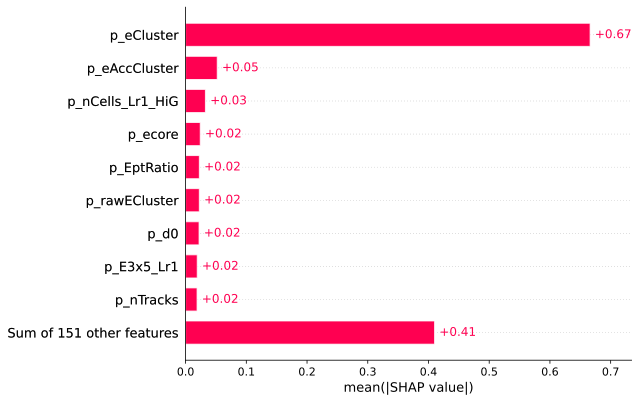

,col_name,feature_importance_vals
22,p_eCluster,0.666156
33,p_eAccCluster,0.052118
115,p_nCells_Lr1_HiG,0.032646
99,p_ecore,0.024128
17,p_EptRatio,0.022625
25,p_rawECluster,0.022583
14,p_d0,0.022185
147,p_E3x5_Lr1,0.019166
7,p_nTracks,0.018896
84,p_deltaEta2,0.016746


In [ ]:
# xgboost
import xgboost

def shap_xgbooster():
    model = xgboost.XGBRegressor().fit(X, y)
    explainer = shap.Explainer(model)
    shap_values = explainer(X)

    feature_names = shap_values.feature_names
    shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
    vals = np.abs(shap_df.values).mean(0)
    shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
    shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
    shap.plots.bar(shap_values)

    return shap_importance.head(20)

shap_xgbooster()

In [ ]:
shap_variables = ['p_eCluster', 'p_eAccCluster', 'p_nCells_Lr1_HiG', 'p_ecore', 'p_EptRatio', 'p_rawECluster', 'p_d0', 'p_E3x5_Lr1', 'p_nTracks', 'p_deltaEta2', 'p_pt_track', 'p_deltaPhi2' ]

X_shap = train[shap_variables]
X_shap = X_shap[electron_truth==1]
X_shap = sc_X.fit_transform(X_shap)
X_shap = pd.DataFrame(X_shap, columns=shap_variables)

sc_y_shap = preprocessing.StandardScaler()
y_shap = train['p_truth_E']
y_shap = y_shap[electron_truth==1]
y_shap = y_shap.to_numpy(dtype='float32')
y_shap = np.reshape(y_shap, (-1,1))
y_shap = sc_y_shap.fit_transform(y_shap)
y_shap = y_shap.ravel()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # neural network

# def optimized_nn():
#     X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test = train_test_split(X_kbest, y_kbest, test_size=0.2, random_state=12)
#     model = Sequential([
#         Dense(9,activation='relu',name='input_layer'),
#         Dense(24,activation='relu',name='hidden_layer1'),
#         Dense(12,activation='relu',name='hidden_layer2'),
#         Dense(1, name='output')])

   
#     model.compile(optimizer='adam',
#                 loss='binary_logloss',
#                 metrics='Accuracy')

#     print('--------- TRAINING ---------')
#     history = model.fit(x=X_lgb_train, y=y_lgb_train, validation_data=(X_lgb_test, y_lgb_test), epochs = 5)  
#     score = model.evaluate(X_lgb_test,  y_lgb_test, verbose=2)
#     y_pred = model.predict(X_lgb_test)
#     # y_pred = sc_y.inverse_transform(y_pred)

#     return score, y_pred

# optimized_nn()

--------- TRAINING ---------
Epoch 1/5


ValueError: in user code:

    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\engine\compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\engine\compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\engine\compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\losses.py", line 2367, in get
        return deserialize(identifier)
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\losses.py", line 2322, in deserialize
        return deserialize_keras_object(
    File "e:\STUDY\CODING\ANACONDA\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: binary_logloss. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
